In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (precision_score,
                             recall_score,
                             accuracy_score,
                             f1_score,
                             confusion_matrix,
                             plot_confusion_matrix)
from xgboost import XGBClassifier



In [22]:
def test_xgb_model(param_grid, X_train, y_train, X_test, y_test):
    """
    Test different preparations of train / test data with different grid search
    parameters

    Parameters
    ----------
        param_grid: dict
            param_grid input to sklearn GridSearchCV
        X_train: pd.DataFrame
            X / predictive features of training data
        y_train: pd.DataFrame
            y / target feature of training data
        X_test: pd.DataFrame
            X / predictive features of test data
        y_test: pd.DataFrame
            y / target feature of test data

    Returns
    _______
        (best_params_, results)
        best_params: dict
            parameters of best model from grid search
        results: dict
            train / test results from best model, including:
            accuracy, precision, recall, true & false positives and negatives

    """
    xgbmodel = XGBClassifier()
    model_search = GridSearchCV(estimator=xgbmodel,
                                param_grid=param_grid,
                                n_jobs=-2,
                                scoring='roc_auc')
    model_search.fit(X_train,y_train)

    train_pred = (model_search.predict(X_train)).reshape(-1,1)
    test_pred = (model_search.predict(X_test)).reshape(-1,1)

    train_accuracy = accuracy_score(train_pred, y_train)
    test_accuracy = accuracy_score(test_pred, y_test)

    train_recall = recall_score(y_train, train_pred)
    test_recall = recall_score(y_test, test_pred)

    train_precision = precision_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)

    test_conf_matrix = confusion_matrix(y_test, test_pred)

    results = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Precision": train_precision,
        "Train Recall": train_recall,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test True -": test_conf_matrix[0][0],
        "Test False -": test_conf_matrix[1][0],
        "Test True +": test_conf_matrix[1][1],
        "Test False +": test_conf_matrix[0][1],
    }

    return model_search.best_params_, results

In [19]:
# test with plain X_train i.e. not resampled or one hot / target encoded

data_dir = "../data/train_test_data/"
plain_X_train = pd.read_pickle(data_dir + "X_train.pkl")
y_train = pd.read_pickle(data_dir + "y_train.pkl")

plain_X_test = pd.read_pickle(data_dir + "X_test.pkl")
y_test = pd.read_pickle(data_dir + "y_test.pkl")

for feature in plain_X_train.columns:
    if plain_X_train[feature].dtype.name == "category":
        for df in [plain_X_train, plain_X_test]:
            df[feature] = df[feature].cat.codes

# requires scale_pos_weight i.e. ratio of negative / positive examples
plain_param_grid = {
    "scale_pos_weight": [4.85],
    "n_estimators": [10, 30, 100, 300, 1000, 1300, 3000],
    "max_depth": [2, 3, 10, 13, 20, 23],
    "learning_rate": [ 0.1, 0.03, 0.01, 0.003],
    "reg_lambda": [10, 50, 100],
    "gamma": [0.25, 1.0, 10]
}

plain_best_params, plain_results = test_xgb_model(plain_param_grid,
                                                  plain_X_train, y_train,
                                                  plain_X_test, y_test)

In [20]:
plain_best_params

{'gamma': 1.0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 3000,
 'reg_lambda': 10,
 'scale_pos_weight': 4.85}

In [21]:
plain_results

{'Train Accuracy': 0.9449275362318841,
 'Test Accuracy': 0.704225352112676,
 'Train Precision': 0.14814814814814814,
 'Train Recall': 1.0,
 'Test Precision': 0.14814814814814814,
 'Test Recall': 0.17391304347826086,
 'Test True -': 96,
 'Test False -': 19,
 'Test True +': 4,
 'Test False +': 23}

In [ ]:
###  CORRECTION FOR ERRORS ABOVE - DELETE AFTER ###
y_train = pd.read_pickle(data_dir + "y_train.pkl")
y_test = pd.read_pickle(data_dir + "y_test.pkl")

In [ ]:
# test with ohe data (not resampled)

X_train_ohe = pd.read_pickle(data_dir + "X_train_ohe.pkl")
X_test_ohe = pd.read_pickle(data_dir + "X_test_ohe.pkl")

ohe_best_params, ohe_results = test_xgb_model(plain_param_grid,
                                              X_train_ohe, y_train,
                                              X_test_ohe, y_test)

In [ ]:
ohe_best_params

Accuracy Train:  0.901, Accuracy Test: 0.739
Recall Train:  1.000, Recall Test: 0.304
Precision Train:  0.250, Precision Test: 0.250
[[98 21]
 [16  7]]


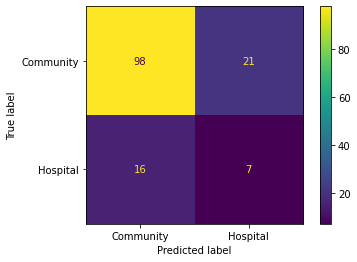

In [15]:
ohe_results

In [ ]:
# test with target encoded data (not resampled)

X_train_target = pd.read_pickle(data_dir + "X_train_target.pkl")
X_test_target = pd.read_pickle(data_dir + "X_test_target.pkl")

ohe_best_params, ohe_results = test_xgb_model(plain_param_grid,
                                              X_train_target, y_train,
                                              X_test_target, y_test)